# Fake News Detection

**Author**: Marcelo Scatena
***
March 2022

## LDA <a class="anchor" id="Classification"></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [4]:
%store -r df_train_clean
%store -r df_val_clean
%store -r df_test_clean

In [5]:
import spacy

In [49]:
import pyLDAvis

In [50]:
import gensim

In [6]:
import pyLDAvis.gensim_models

In [35]:
nlp = spacy.load('en_core_web_sm')

In [36]:
from pycaret.nlp import *

In [37]:
fake_news_nlp = setup(data = df_train_clean, target = 'statement', session_id = 123)

Description,Value
session_id,123
Documents,10240
Vocab Size,7047
Custom Stopwords,0


In [38]:
lda = create_model('lda', num_topics=6, multi_core=True)

In [40]:
print(lda)

LdaModel(num_terms=7047, num_topics=6, decay=0.5, chunksize=100)


In [41]:
lda_df = assign_model(lda)

In [97]:
lda_df.head()

,statement,label,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Dominant_Topic,Perc_Dominant_Topic
0.0,say annie list political group support third t...,1.0,0.015317,0.015353,0.015297,0.628550,0.203823,0.121660,Topic 3,0.63
1.0,coal start start natural_gas take start begin ...,1.0,0.018522,0.018604,0.018595,0.907018,0.018689,0.018572,Topic 3,0.91
2.0,agree voting give benefit doubt,0.0,0.027914,0.027880,0.028162,0.027841,0.860420,0.027782,Topic 4,0.86
3.0,health care reform legislation likely mandate ...,1.0,0.923455,0.015788,0.015155,0.015221,0.015186,0.015194,Topic 0,0.92
4.0,economic turnaround start end term,1.0,0.358883,0.028231,0.027996,0.529207,0.027849,0.027834,Topic 3,0.53


In [45]:
plot_model()

In [46]:
plot_model(plot = 'bigram')

In [48]:
plot_model(lda, plot = 'topic_distribution')

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



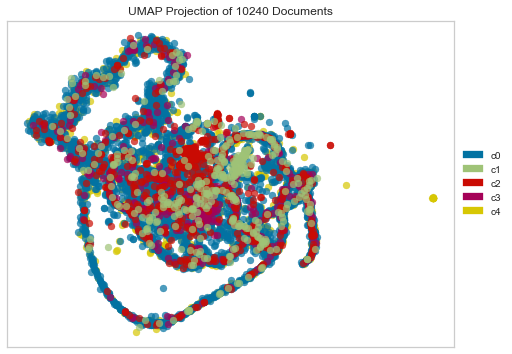

In [49]:
plot_model(lda, plot = 'umap')

In [51]:
save_model(lda,'Final LDA Model 08Feb2020')

Model Succesfully Saved


(<gensim.models.ldamulticore.LdaMulticore at 0x22135006700>,
 'Final LDA Model 08Feb2020.pkl')

In [52]:
print(lda)

LdaModel(num_terms=7047, num_topics=6, decay=0.5, chunksize=100)


In [53]:
saved_lda = load_model('Final LDA Model 08Feb2020')

Model Sucessfully Loaded


In [54]:
print(saved_lda)

LdaModel(num_terms=7047, num_topics=6, decay=0.5, chunksize=100)


### Model 2

In [65]:
fake_news_nlp_2 = setup(data = df_train_clean, target = 'statement', session_id = 123,
                       custom_stopwords = ['say', 'percent', 'state', 'people', 'vote,', 'get', 'country',
                                           'government', 'support', 'work', 'come', 'city', 'month', 'half', 'year'],
                       log_experiment = True, experiment_name = 'fake_with_words')

Description,Value
session_id,123
Documents,10240
Vocab Size,7008
Custom Stopwords,1


In [66]:
lda2 = create_model('lda', num_topics=8, multi_core=True)

In [67]:
plot_model()

In [68]:
plot_model(plot = 'bigram')

In [70]:
plot_model(lda2, plot = 'topic_distribution')

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [71]:
tuned_unsupervised = tune_model(model = 'lda', multi_core = True)

IntProgress(value=0, description='Processing: ', max=25)

Output()

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Best Model: Latent Dirichlet Allocation | # Topics: 64 | Coherence: 0.5445


In [77]:
# tuned_classification = tune_model(model = 'lda', multi_core = True, supervised_target = 'label')

In [46]:
plot_model(lda, plot = 'tsne')

In [18]:
plot_model(lda, plot = 'bigram')

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
from pycaret.classification import *

In [28]:
random_state=None
seed=None

In [31]:
# setup(data = lda_df, 
#       target = 'label',
#       fold_shuffle=False,
#       data_split_shuffle=False)

In [92]:
save_model(lda2,'LDA_Model2')

Model Succesfully Saved


(<gensim.models.ldamulticore.LdaMulticore at 0x22168744280>, 'LDA_Model2.pkl')

In [81]:
df_train_clean_2 = df_train_clean.reset_index(drop=True)

In [82]:
df_train_clean_2

,statement,label
0,say annies list political group support third ...,1
1,decline coal start started natural gas took st...,1
2,hillary clinton agrees john mccain voting give...,0
3,health care reform legislation likely mandate ...,1
4,economic turnaround started end term,1
...,...,...
10235,larger number shark attack florida case voter ...,0
10236,democrat become party atlanta metro area black,0
10237,say alternative social security operates galve...,1
10238,lifting u cuban embargo allowing travel cuba,1


### Model 3

In [84]:
fake_news_nlp_3 = setup(data = df_train_clean_2, target = 'statement', session_id = 123,
                       custom_stopwords = ['say', 'percent', 'state', 'people', 'vote,', 'get', 'country',
                                           'government', 'support', 'work', 'come', 'city', 'month', 'half', 'year'],
                       log_experiment = True, experiment_name = 'fake_with_words')

Description,Value
session_id,123
Documents,10240
Vocab Size,7008
Custom Stopwords,1


In [86]:
lda3 = create_model('lda', num_topics=64, multi_core=True)

In [87]:
plot_model()

In [88]:
plot_model(plot = 'bigram')

In [89]:
plot_model(lda3, plot = 'topic_distribution')

In [90]:
tuned_unsupervised = tune_model(model = 'lda', multi_core = True)

IntProgress(value=0, description='Processing: ', max=25)

Output()

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Best Model: Latent Dirichlet Allocation | # Topics: 64 | Coherence: 0.5439


In [96]:
tuned_classification = tune_model(model = 'lda', multi_core = True, supervised_target = 'label')

IntProgress(value=0, description='Processing: ', max=25)

Output()

Best Model: Latent Dirichlet Allocation | # Topics: 200 | Accuracy : 0.6448


In [91]:
lda3_df = assign_model(lda3)

In [94]:
lda3_df.shape

(10240, 68)

In [95]:
save_model(lda3,'LDA_Model3')

Model Succesfully Saved


(<gensim.models.ldamulticore.LdaMulticore at 0x22102f52af0>, 'LDA_Model3.pkl')

In [98]:
plot_model(lda3, plot = 'tsne')